# Machine Learning

Machine Learning (ML) in Artificial Intelligence is the field of study that focuses on developing algorithms and models that enable computers to learn patterns from data and make predictions or decisions without explicit programming. Its goal is to build models that can generalize from observed data to make accurate predictions or decisions on new, unseen data. ML systems can be divided into two broad categories: predictive ML and generative AI.

* **Problem Framing**: First, you need to consider if ML is the right approach to the problem and how to frame the problem in ML terms. 
* **Model Evaluation**: *A non-ML solution is the benchmark to measure an ML solution against* refers to using non-Machine Learning solutions as the baseline for evaluating and comparing the performance of solutions. This evaluation involve various metrics such as Accuracy, F1 Score, etc.

[Read Google's guidelines here.](https://developers.google.com/machine-learning/problem-framing/problem)

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Detecting Ride Anomalies Using DBSCAN

In this implementation, we apply unsupervised learning to detect anomalies in ride data. Specifically, we use the [Density-Based Spatial Clustering of Applications with Noise](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm to identify clusters in the data and the elements that don't belong to any cluster. These unclustered elements, also referred to as noise or outliers, might signify instances where unusual or unexpected events have occurred. The example provided illustrates this concept in detail. This example is taken from Packt.

<Axes: xlabel='ride_dist', ylabel='ride_time'>

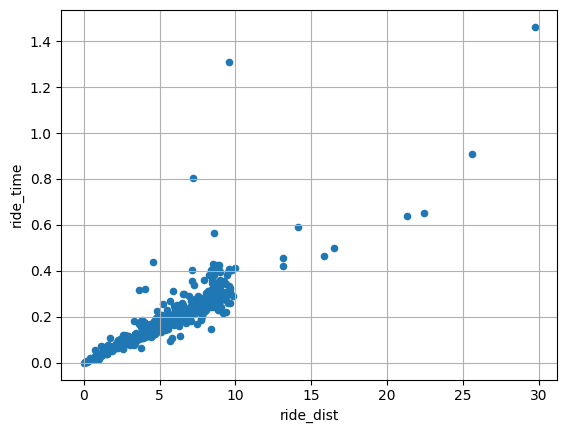

In [2]:
df = pd.read_csv('data/rides.csv')
df.plot(x='ride_dist', y='ride_time', kind='scatter', grid=True)

Estimated number of clusters: 1
Estimated number of noise points: 16


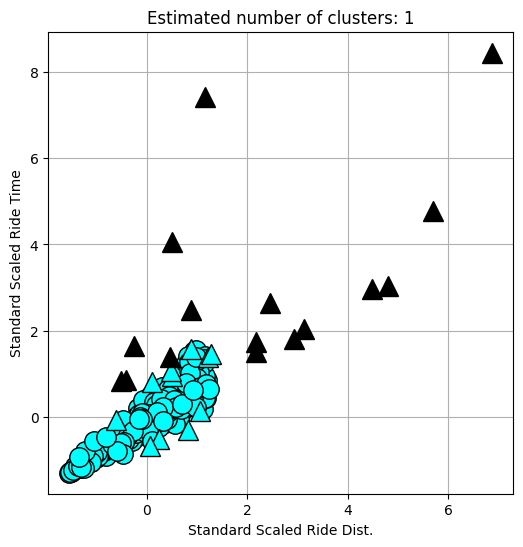

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

def cluster_and_label(X, create_and_show_plot=True):
    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=0.3, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

    metadata = {
        'clusters': n_clusters_,
        'noise': n_noise_,
        'silhouette_coefficient': metrics.silhouette_score(X, labels),
        'labels': labels,
    }

    if create_and_show_plot == True:
        fig = plt.figure(figsize=(6,6))
        unique_labels = set(labels)
        colors = [plt.cm.cool(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]
            class_member_mask = (labels== k)
            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)
            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], '^', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)
        
        plt.xlabel('Standard Scaled Ride Dist.')
        plt.ylabel('Standard Scaled Ride Time')
        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.grid()
        plt.show()
    else:
        pass
    return metadata

X = df[['ride_dist', 'ride_time']]
results = cluster_and_label(X)
df['label'] = results['labels']

## Obstacle Detection using CNN

This code employs a Convolutional Neural Network (CNN) for obstacle detection, where "0" signifies no obstacle and "1" its presence. The detection relies on the image's depth value, with the algorithm detailed [here](https://github.com/kayesokua/bikeway-obstacles-detection/blob/main/02_data_preparation.ipynb). The CNN structure features three convolutional and max-pooling sets, a flatten layer, and two dense layers with ReLU and sigmoid activations respectively. Performance can be evaluated using the F1 score or accuracy.

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

model_name = "obstacle_detection_v3"

X = np.load("data/train_x.npy", allow_pickle=True)
y = np.load("data/train_y_manual.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

model.save(f"{model_name}.h5")
model.summary()

Epoch 1/50
17/17 [==============================] - 41s 2s/step - loss: 327.7452 - accuracy: 0.5463 - val_loss: 0.6123 - val_accuracy: 0.7085
Epoch 2/50
17/17 [==============================] - 28s 2s/step - loss: 0.6119 - accuracy: 0.6776 - val_loss: 0.6298 - val_accuracy: 0.6951
Epoch 3/50
17/17 [==============================] - 27s 2s/step - loss: 0.5124 - accuracy: 0.7838 - val_loss: 0.5714 - val_accuracy: 0.7444
Epoch 4/50
17/17 [==============================] - 29s 2s/step - loss: 0.4148 - accuracy: 0.8417 - val_loss: 0.6005 - val_accuracy: 0.7444
Epoch 5/50
17/17 [==============================] - 29s 2s/step - loss: 0.2802 - accuracy: 0.8822 - val_loss: 0.7278 - val_accuracy: 0.7534
Epoch 6/50
17/17 [==============================] - 25s 1s/step - loss: 0.1559 - accuracy: 0.9440 - val_loss: 0.7510 - val_accuracy: 0.7265
Epoch 7/50
17/17 [==============================] - 28s 2s/step - loss: 0.3877 - accuracy: 0.8977 - val_loss: 0.6069 - val_accuracy: 0.7220
Epoch 8/50
17/17 [

/Users/caijinsi/.pyenv/versions/venv3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 286, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 191, 143, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 141, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 94, 70, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 68, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 46, 34, 128)       0

In [ ]:
from sklearn.metrics import f1_score
from skimage.transform import resize

model = load_model('obstacle_detection_v3.h5')

# Define the input directory and true labels
input_dir = 'data/validate-rgbd/'
true_labels = np.load('data/labels/validate_y.npy')

image_files = sorted([f for f in os.listdir(input_dir) if f.endswith('.png')])
IMAGE_SIZE = (384, 288)

for i, filename in enumerate(image_files):
    image_path = os.path.join(input_dir, filename)
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image = resize(image, IMAGE_SIZE, preserve_range=True)
    data = np.array(image)
    data = np.expand_dims(data, axis=0)  # shape: (1, 384, 288, 4)

    # Make predictions on the image
    predictions = model.predict(data)

    # Print the predicted classes
    predicted_class = np.argmax(predictions, axis=1)[0]
    print(f"File {filename}: predicted class {predicted_class}")
    predicted_labels = {}
    # Store predicted label
    predicted_labels[i] = predicted_class
    print(predicted_labels)

## Dance Classification with MobileNetV2, MediaPipe Pose, and DecisionTreeClassifier

The code provided utilizes OpenCV for video processing, MediaPipe for pose estimation, and MobileNetV2 for extracting features from dance videos to classify different dance styles such as ballet, contemporary, jazz, and kpop. It reads videos, detects human poses in the frames, extracts relevant features using the pre-trained MobileNetV2 model, and prepares the data for training a supervised machine learning model. The success criteria for this application could include high accuracy in classifying various dance styles, efficient processing of video data, robustness in handling different video qualities and dance forms, and the capability to generalize well to unseen dance performances.

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.models import Model
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

base_model = MobileNetV2(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('global_average_pooling2d').output)

def extract_features(video_path, model):
    try:
        cap = cv2.VideoCapture(video_path)
    except:
        print(f"Could not open video file: {video_path}")
        return None

    features = []
    frame_counter = 0
    max_frames = 24 * 16  # Limit to approximately 30 seconds
    
    while cap.isOpened() and frame_counter < max_frames:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (224, 224))

        with mp_pose.Pose(
            static_image_mode=False,
            model_complexity=2,
            enable_segmentation=True,
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5) as pose:
            results = pose.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Only processes frames with detected pose landmarks
        if results.pose_landmarks:
            preprocessed_frame = preprocess_input(frame)
            feature = model.predict(np.expand_dims(preprocessed_frame, axis=0))
            features.append(feature.squeeze())
            frame_counter += 1
        print(f"Processed frame {frame_counter} of {video_path}")

        cap.set(cv2.CAP_PROP_POS_FRAMES, cap.get(cv2.CAP_PROP_POS_FRAMES) + 10)

    cap.release()

    imputer = SimpleImputer(strategy='mean')
    imputed_features = imputer.fit_transform(features)

    if len(features) == 0:
        print(f"No pose detected in video: {video_path}")
        return None

    print(f"Extracted features from {video_path}")

    return np.mean(imputed_features, axis=0)

def get_model_labels(video_paths, labels, X_filename, y_filename):
    features_list = [extract_features(video_path, model) for video_path in video_paths]
    X = np.vstack(features_list)
    y = np.array(labels, dtype=str)
    np.save(f"{X_filename}", X)
    np.save(f"{y_filename}", y)
    return print("Training labels saved")

train_videos = [
    "train/ballet_0.mp4", "train/ballet_1.mp4", "train/ballet_2.mp4", "train/ballet_3.mp4", "train/ballet_4.mp4",
    "train/contemporary_0.mp4", "train/contemporary_1.mp4", "train/contemporary_2.mp4", "train/contemporary_3.mp4", "train/contemporary_4.mp4",
    "train/jazz_0.mp4", "train/jazz_1.mp4", "train/jazz_2.mp4", "train/jazz_3.mp4", "train/jazz_4.mp4",
    "train/kpop_0.mp4", "train/kpop_1.mp4", "train/kpop_2.mp4", "train/kpop_3.mp4", "train/kpop_4.mp4"]
train_labels = ['ballet', 'ballet', 'ballet', 'ballet', 'ballet',
          'contemporary', 'contemporary', 'contemporary', 'contemporary', 'contemporary',
          'jazz', 'jazz', 'jazz', 'jazz', 'jazz',
          'kpop', 'kpop', 'kpop', 'kpop', 'kpop']

get_model_labels(train_videos, train_labels, "X_train.npy", "y_train.npy")

eval_videos = ["eval/ballet_0.mp4","eval/ballet_1.mp4","eval/contemporary_0.mp4","eval/contemporary_1.mp4","eval/kpop_0.mp4"]
eval_labels = ['ballet', 'ballet', 'contemporary', 'contemporary', 'kpop']

get_model_labels(eval_videos, eval_labels, "X_eval.npy", "y_eval.npy")

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_eval = np.load("X_eval.npy", allow_pickle=True)
y_eval = np.load("y_eval.npy", allow_pickle=True)

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)
dump(model, 'dance_classifier.joblib')

loaded_model = load('dance_classifier.joblib')
predictions = loaded_model.predict(X_eval)

for i in range(len(predictions)):
    print('Predicted label:', predictions[i], 'Correct label:', y_eval[i])

## Chat Recommendations with Decision Tree Classifier

Using the Decision Tree Classifier, this system maps input features (like techniques, focus, intensity, and expertise) to relevant recommendation labels. This supervised learning algorithm constructs a decision tree structure to make accurate classifications. Jaccard similarity is employed for scoring similarity between inputs and labels.

In [ ]:
import os, random, json
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)


def load_movement_vocabulary():
    with open("data/movement_vocabulary.json", "r") as f:
        movement_vocabulary = json.load(f)
    return movement_vocabulary

def load_techniques_list(movement_vocabulary):
    techniques_list = []
    for k, v in movement_vocabulary.items():
        techniques_list.append(k)
    return techniques_list

def load_session_data():
    sessions = []
    for filename in os.listdir("data/chatbot"):
        if filename.endswith(".json"):
            with open("data/chatbot/" + filename, "r") as f:
                session_data = json.load(f)
                session_data["id"] = filename.split(".")[0]
                sessions.append(session_data)
    return sessions

movement_vocabulary = load_movement_vocabulary()
chat_sessions = load_session_data()

X = []
y = []

for chat_session in chat_sessions:
    techniques = chat_session['techniques']
    focus = chat_session['focus'][0]
    intensity = chat_session['intensity'][0]
    expertise = chat_session['expertise']
    for recommendation in chat_session['recommendations']:
        X.append(recommendation)
        y.append(f"{techniques[0]} {focus} {intensity} {expertise[0]}")

pipeline = make_pipeline(
    CountVectorizer(),
    DecisionTreeClassifier()
)
pipeline.fit(X, y)

# Example usage of the model to generate a response

while True:
    chat_input = input("What would you like to do?")

    # Example: "Fish roll"
    # Example: "Roll with stability"
    # Example: "pique turn with flexibility"

    keywords = chat_input.lower().split()

    # Create a list of possible technique and focus keywords
    technique_keywords = load_techniques_list(movement_vocabulary)
    focus_keywords = {
        "stability": ["stability", "balance", "center", "core", "strength", "steadiness", "balance", "poise", "equilibrium", "firmness"],
        "flexibility": ["flexibility", "stretch", "stretching", "flex", "flexing"],
        "coordination": ["coordination", "control", "controlling", "timing", "harmony", "synchronization","collaboration", "organization"],
        "artistry": ["artistry", "expression", "expressing", "express", "style", "styling"],
        "amateur": ["basic", "beginner", "beginners", "beginning", "fundamentals"],
        "intermediate": ["experienced", "intermediate", "intermediates", "intermediary", "intermediating", "intermediation"],
        "advanced": ["professional", "expert", "industry"]
    }

    technique_words_split = []
    for technique in technique_keywords:
        technique_words_split.extend(technique.lower().split())

    # Find the technique and focus keywords in the user input
    match_found = []

    for keyword in keywords:
        for focus_key, focus_values in focus_keywords.items():
            if keyword in focus_values:
                match_found.append(focus_key)

        if keyword in technique_words_split:
            match_found.append(keyword)

    # Convert matchfound into a set of lowercase words
    matchfound_set = set(match_found)

    # Find the best matching label using Jaccard similarity
    best_label_index = -1
    max_similarity = 0

    for i, label in enumerate(y):
        label_set = set(label.lower().split())
        similarity = jaccard_similarity(matchfound_set, label_set)
        if similarity > max_similarity:
            max_similarity = similarity
            best_label_index = i

    if best_label_index != -1:
        best_recommendation = X[best_label_index]
        print(f"Here's my recommendation: {best_recommendation}")
    else:
        print(f"No instructions found for {chat_input}")

What would you like to do? fish roll


Here's my recommendation: Fish Roll and Flop is a movement where the dancer rolls their body in a fluid motion resembling the movement of a fish, while the Flop is a contemporary dance move where the dancer falls to the ground in a sudden and dramatic manner.. For practicing Fish Roll and Flop as a/an advanced performance, the recommended warm-up exercises are Yoga dolphin pose: Begin on your hands and knees, then lift your hips up and press your hands and forearms into the ground. Hold for 10-20 seconds, then release., Handstand preparation: Practice handstand preparation exercises, such as kicking up against a wall or using a partner for support., Pilates swan dive: Lie on your stomach with your arms extended in front of you. Lift your arms, chest, and legs off the ground simultaneously, then release back down. Repeat for 10-15 repetitions. for 3 repetitions for 5 minutes. After warming up, you should practice the following instructions: Stand with feet hip-width apart and engage you

What would you like to do? roll with stability


Here's my recommendation: Fish Roll and Flop is a movement where the dancer rolls their body in a fluid motion resembling the movement of a fish, while the Flop is a contemporary dance move where the dancer falls to the ground in a sudden and dramatic manner.. For practicing Fish Roll and Flop as a/an amateur performance, the recommended warm-up exercises are Shoulder shrugs: Stand with your arms at your sides and your shoulders relaxed. Shrug your shoulders up towards your ears, hold for a few seconds, then release and lower them back down., Arm circles: Stand with your arms extended out to the sides, parallel to the ground. Begin making circular motions with your arms, first small and gradually increasing the size of the circles. Repeat in the opposite direction., Cat-cow stretch: Begin on your hands and knees, with your wrists under your shoulders and knees under your hips. Arch your back and tuck your chin towards your chest, then release and let your belly drop towards the ground,

## Learning Resources

* Trollman, Frank. Artificial Intelligence Basics. CODE University of Applied Sciences. [code.berlin](https://code.berlin/en/about/team/)
* Google for Developers. Introduction to Machine Learning. [developers.google.com](https://developers.google.com/machine-learning/intro-to-ml)
* Bowles, M. (2015). Machine Learning In Python: Essential Techniques for Predictive Analysis. Wiley Publishing. [Available via Scribd](https://www.scribd.com/read/261058954/Machine-Learning-in-Python-Essential-Techniques-for-Predictive-Analysis)
* Gollapudi, Sunila. Practical Machine Learning. Packt Publishing. [packtpub.com](https://www.packtpub.com/product/practical-machine-learning/9781784399689)
* Amr, Tarek. (2020). Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits. Packt Publishing. [packtpub.com](https://www.packtpub.com/product/hands-on-machine-learning-with-scikit-learn-and-scientific-python-toolkits/9781838826048)
* Tensorflow. Convolutional Neural Network. [tensorflow.org](https://www.tensorflow.org/tutorials/images/cnn)
* TensorFlow. Module Name: MobileNetV2. [tensorflow.org](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2)
* TensorFlow. Long Short-Term Memory. [tensorflow.org](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
*  Artley, Brendan. Time Series Forecasting with ARIMA , SARIMA and SARIMAX. Towards Data Science. [towardsdatascience.com](https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6)
* DataCamp. Decision Tree Classification in Python Tutorial. [datacamp.com](https://www.datacamp.com/tutorial/decision-tree-classification-python)
* Yadav, Prince. Decision Tree in Machine Learning. [towardsdatascience.com](https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96)
* Jaccard Similarity. https://www.statology.org/jaccard-similarity/